# Aprendizagem - Homework I
### II. Programming - Grupo99
(ist1106059, ist1106329)

1. Utilizando a função f_classif da biblioteca sklearn, foi possível identificar a variável com maior e menor poder de discriminação. Criámos um DataFrame com duas colunas – ‘Feature’ e ‘F-Value’, onde os elementos estão ordenados de forma decrescente do F-Value. Desta forma, podemos concluir que a variável com maior poder de discriminação é a Glucose (maior F-Value) e a variável com menor poder de discriminação é a BloodPressure (menor F-Value).
<br>
Com estes dados recolhidos, conseguimos criar gráficos onde podemos visualizar a função densidade de probabilidade de cada variável em relação às classes existentes.

In [104]:
from scipy.io import arff
import pandas as pd
from sklearn.feature_selection import f_classif

data = arff.loadarff('diabetes.arff')

df = pd.DataFrame(data[0])

# separar features do outcome
x = df.drop(columns=['Outcome'])
y = df['Outcome'].str.decode('utf-8')

# calcular F-values
F_value = f_classif(x, y)[0]

# criar dataframe com features ordenadas pelo F-value
df_results = pd.DataFrame({'Feature': x.columns, 'F-Value': F_value})
df_results.sort_values(by='F-Value', ascending=False, inplace=True)

print(df_results)


                    Feature     F-Value
1                   Glucose  213.161752
5                       BMI   71.772072
7                       Age   46.140611
0               Pregnancies   39.670227
6  DiabetesPedigreeFunction   23.871300
4                   Insulin   13.281108
3             SkinThickness    4.304381
2             BloodPressure    3.256950


Variável com maior poder disccriminativo: Glucose <br>
Variável com menor poder descriminativo: BloodPressure

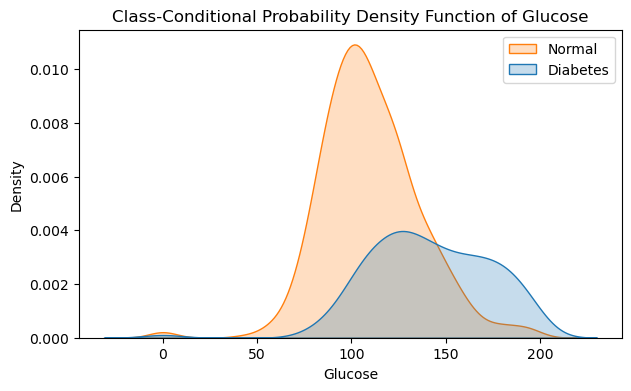

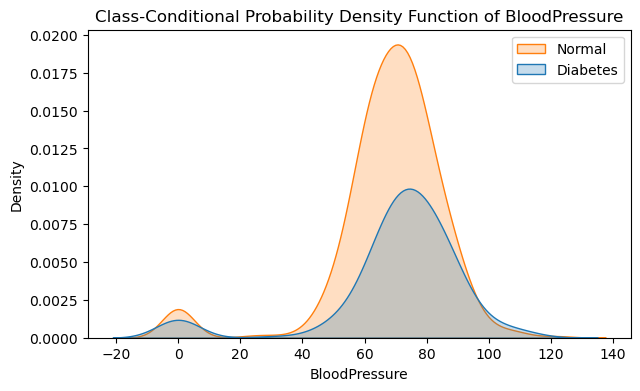

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

best_discriminative_power = df_results.iloc[0]['Feature']
worst_discriminative_power = df_results.iloc[-1]['Feature']


plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=best_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {best_discriminative_power}')
plt.xlabel(best_discriminative_power)
plt.ylabel('Density')
plt.legend(labels=['Normal', 'Diabetes'])

plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=worst_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {worst_discriminative_power}')
plt.xlabel(worst_discriminative_power)
plt.ylabel('Density')
plt.legend(labels=['Normal', 'Diabetes'])

plt.show()

Notámos que existia um aumento de densidade, tanto na glicose como na pressão do sangue, junto ao valor 0. Tendo em conta que é impossível estes valores existirem num ser humano vivo, adicionámos uma restrição para ignorar os valores abaixo do nível 0. Desta forma, os gráficos tornam-se mais realistas uma vez que apenas consideram valores possíveis para estas variáveis.

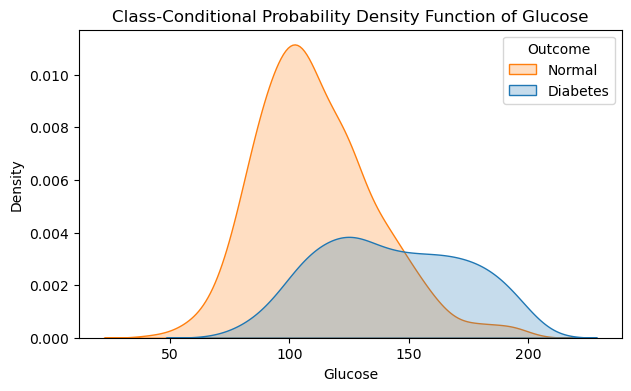

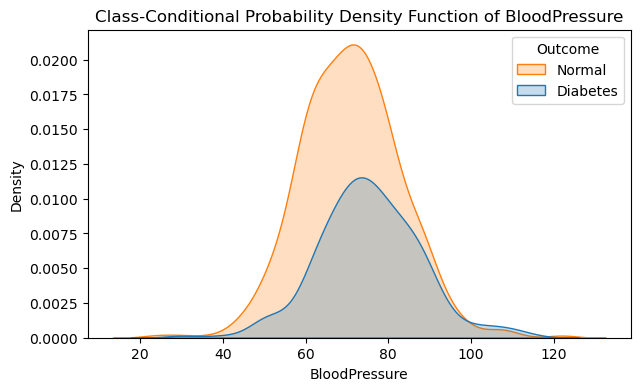

In [106]:
df = df[(df['BloodPressure'] > 0) & (df['Glucose'] > 0)]

plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=best_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {best_discriminative_power}')
plt.xlabel(best_discriminative_power)
plt.ylabel('Density')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=worst_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {worst_discriminative_power}')
plt.xlabel(worst_discriminative_power)
plt.ylabel('Density')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

plt.show()

2. O objetivo desta questão era realizar uma análise do desempenho e capacidade de generalização de um modelo de árvore de decisão, variando o parâmetro min_samples_split. Para isso, fizemos 10 execuções de avaliação da árvore, com diferentes valores desse parâmetro, calculando a accuracy média de teste e treino para cada valor. São feitas todas estas execuções de forma a garantir a estabilidade dos resultados obtidos. De seguida, fizemos o gráfico que nos permite visualizar a relação da accuracy com o aumento do parâmetro min_samples_split. Desta forma, conseguirmos concluir qual o melhor valor de min_samples_split de forma a existir um equilíbrio entre overfitting e underfitting.

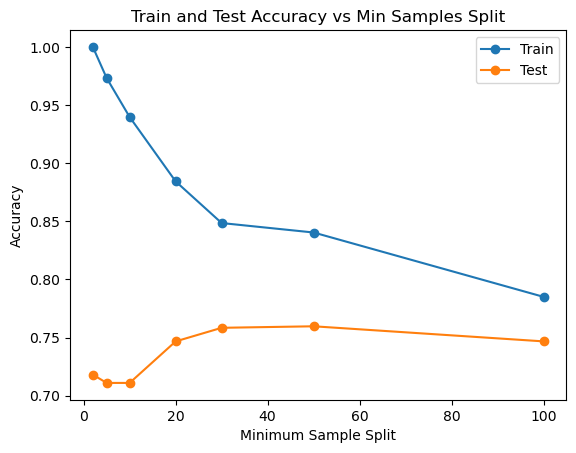

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

num_runs = 10
min_sample_splits = [2, 5, 10, 20, 30, 50, 100]

train_accuracies = []
test_accuracies = []

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

for min_sample_split in min_sample_splits:
  sum_train_accuracies = 0
  sum_test_accuracies = 0

  for _ in range(num_runs):    
    classifier = DecisionTreeClassifier(min_samples_split=min_sample_split)
    
    classifier.fit(x_train, y_train)
    
    y_train_predictions = classifier.predict(x_train)
    y_test_predictions = classifier.predict(x_test)

    sum_train_accuracies += accuracy_score(y_train, y_train_predictions)
    sum_test_accuracies += accuracy_score(y_test, y_test_predictions)

  train_accuracies.append(sum_train_accuracies/num_runs)
  test_accuracies.append(sum_test_accuracies/num_runs)


plt.plot(min_sample_splits, train_accuracies, label='Train', marker='o')
plt.plot(min_sample_splits, test_accuracies, label='Test', marker='o')

plt.xlabel('Minimum Sample Split')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Min Samples Split')
plt.legend()

plt.show()

4. A árvore de decisão deste exercício foi treinada com todos os dados disponíveis e com uma profundidade máxima de 3 para evitar overfitting. O objetivo desta árvore é dividir as várias features do dataset e criar associações condicionais para, nas folhas, reunir as observações com características semelhantes e conseguir identificar o conjunto de características ou regras de associação que melhor identificam indivíduos com diabetes.

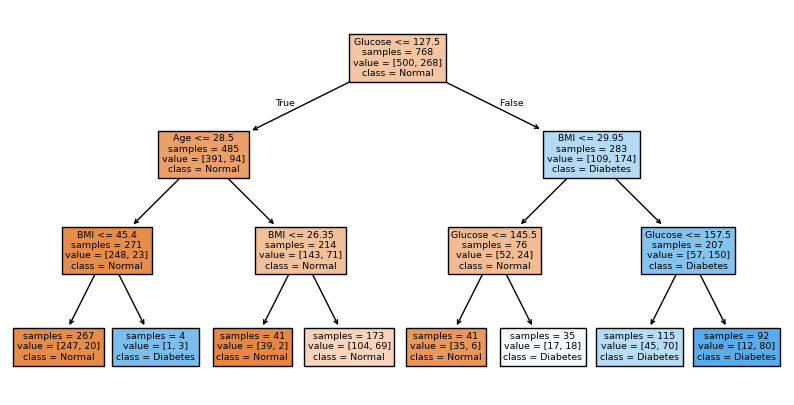

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=1, max_depth=3)
clf.fit(x, y)

plt.figure(figsize=(10,5))
tree.plot_tree(clf, feature_names=x.columns, class_names=['Normal', 'Diabetes'], filled=True, impurity=False)
plt.show()